In [ ]:
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101.rar

--2024-01-05 07:00:56--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/rar]
Saving to: ‘UCF101.rar’

UCF101.rar          100%[===================>]   6.46G  96.3MB/s    in 76s     

2024-01-05 07:02:12 (87.3 MB/s) - ‘UCF101.rar’ saved [6932971618/6932971618]



In [ ]:
!unrar x UCF101.rar

ストリーミング出力は最後の 5000 行に切り捨てられました。
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c05.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c06.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c07.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c01.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c02.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c03.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c04.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c05.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c06.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c07.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuita

In [ ]:
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip

--2024-01-05 07:04:21--  https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 113943 (111K) [application/zip]
Saving to: ‘UCF101TrainTestSplits-RecognitionTask.zip’

UCF101TrainTestSpli 100%[===================>] 111.27K  --.-KB/s    in 0.04s   

2024-01-05 07:04:22 (2.99 MB/s) - ‘UCF101TrainTestSplits-RecognitionTask.zip’ saved [113943/113943]



In [ ]:
!unzip /content/UCF101TrainTestSplits-RecognitionTask.zip

Archive:  /content/UCF101TrainTestSplits-RecognitionTask.zip
   creating: ucfTrainTestlist/
  inflating: ucfTrainTestlist/classInd.txt  
  inflating: ucfTrainTestlist/testlist01.txt  
  inflating: ucfTrainTestlist/testlist02.txt  
  inflating: ucfTrainTestlist/testlist03.txt  
  inflating: ucfTrainTestlist/trainlist01.txt  
  inflating: ucfTrainTestlist/trainlist02.txt  
  inflating: ucfTrainTestlist/trainlist03.txt  


In [ ]:
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 25.9 MB/s eta 0:00:00


In [ ]:
import torchvision
from torchvision.datasets import UCF101
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import av

In [122]:
# データセットのルートディレクトリ
root = 'UCF-101'

# アノテーションファイルのパス
annotation_path = 'ucfTrainTestlist'

tfs = transforms.Compose([
            # TODO: this should be done by a video-level transfrom when PyTorch provides transforms.ToTensor() for video
            # scale in [0, 1] of type float
            transforms.Lambda(lambda x: x / 255.),
            # reshape into (T, C, H, W) for easier convolutions
            transforms.Lambda(lambda x: x.permute(0, 3, 1, 2)),
            # rescale to (64, 64)
            transforms.Resize(64),
            transforms.CenterCrop(64),
])

# データセットオブジェクトを作成
ucf101 = UCF101(root=root,
                annotation_path=annotation_path,
                frames_per_clip=16,
                train=True,
                transform=tfs)

100%|██████████| 833/833 [09:58<00:00,  1.39it/s]


In [123]:
# データローダーの作成
data_loader = DataLoader(ucf101, batch_size=1, shuffle=True)

# データをイテレートして表示する（例）
for i, (video, audio, label)  in enumerate(data_loader):
    print(f"Batch {i}")
    print("Video Shape:", video.shape)
    print("Audio Shape:", audio.shape)
    print("Label:", label)
    if i == 0:  # 2バッチ分のデータを表示してループを抜ける
        break

Batch 0
Video Shape: torch.Size([1, 16, 3, 64, 64])
Audio Shape: torch.Size([1, 1, 0])
Label: tensor([11])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [124]:
from torch.nn.utils.rnn import pad_sequence
import torch

# 動画のみを扱いたい場合

def custom_video_collate_fn(batch):
    # バッチ内のビデオデータを取得
    videos = [item[0] for item in batch]  # item[0] はビデオデータ

    # ビデオデータのテンソルリストを作成
    videos = [torch.tensor(v) for v in videos]

    # ビデオデータをパディング
    videos_padded = pad_sequence(videos, batch_first=True, padding_value=0)

    return videos_padded

# データローダーの作成
data_loader = DataLoader(ucf101, batch_size=4, shuffle=True, collate_fn=custom_video_collate_fn)

for i, videos in enumerate(data_loader):
    print("Batch", i)
    print("Video Shape:", videos.shape)
    if i == 10:  # 11バッチ分のデータを表示してループを抜ける
        break

<ipython-input-124-5fbadab9d6ee>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  videos = [torch.tensor(v) for v in videos]


Batch 0
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 1
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 2
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 3
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 4
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 5
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 6
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 7
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 8
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 9
Video Shape: torch.Size([4, 16, 3, 64, 64])
Batch 10
Video Shape: torch.Size([4, 16, 3, 64, 64])


<ipython-input-124-5fbadab9d6ee>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  videos = [torch.tensor(v) for v in videos]


Batch 0
Video Shape: torch.Size([4, 16, 3, 64, 64])


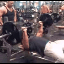

In [157]:
import imageio
from IPython.display import Image, display

# データをイテレートしてビデオをGIFに変換し、表示
for i, videos in enumerate(data_loader):
    # ビデオの形状を表示
    print("Batch", i)
    print("Video Shape:", videos.shape)

    # ビデオをnumpy配列に変換
    video_np = videos[0].permute(0, 2, 3, 1).numpy()

    # ビデオフレームをGIF画像に変換
    gif_path = f'video_batch_{i}.gif'
    imageio.mimsave(gif_path, (video_np * 255).astype('uint8'))

    # GIFを表示
    display(Image(filename=gif_path, height=500, width=500))

    break

Counting frames of videos: 100%|██████████| 13320/13320 [11:35<00:00, 19.16it/s]


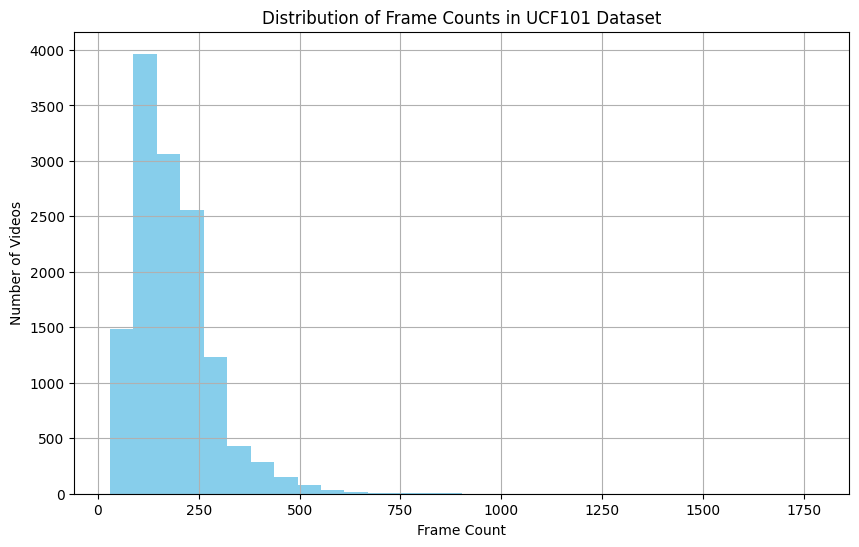

In [ ]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm  # 進行度バーを表示するためのライブラリ

def count_frames(video_path):
    video = cv2.VideoCapture(video_path)
    count = 0
    while video.grab():
        count += 1
    video.release()
    return count

# UCF101データセットのルートディレクトリを指定
root = Path('/content/UCF-101')

# .aviファイルをすべて見つける
video_paths = list(root.glob('**/*.avi'))

# フレーム数を計算し、進行度を表示
frame_counts = []
for video_path in tqdm(video_paths, desc="Counting frames of videos"):
    frame_count = count_frames(str(video_path))
    frame_counts.append(frame_count)

plt.figure(figsize=(10, 6))
plt.hist(frame_counts, bins=30, color='skyblue')
plt.title('Distribution of Frame Counts in UCF101 Dataset')
plt.xlabel('Frame Count')
plt.ylabel('Number of Videos')
plt.grid(True)
plt.show()

In [ ]:
min(frame_counts)

29